# Progress Report

### GitHub Repository: 
https://github.com/chi-city/CS418-Group-Project

### Progress Report link in GitHub:
https://github.com/chi-city/CS418-Group-Project/blob/main/progress_report.ipynb

### Group members:
Alex Castillo, Zaid Awaidah, Zohaib Akram, Peter Rantisi, Joel Christian

## Product introduction:

The urban landscape of major cities in the United States is marked by the coexistence of diversity and challenges.

Among these challenges, crime is an issue of major importance because it directly impacts the safety and well-being of locals and visitors.

What we aim to do with this project is study, analyze, and compare crime data from the year 2022 in two major cities in the US - Chicago and Los Angeles.

Our goal is to identify patterns and trends within the datasets to aid in crime prevention and intervention, particularly in the context of public transportation.

**The Problem:**

Cities like Chicago and Los Angeles are diverse, thriving communities with complex dynamics.

The lack of comprehenseive, comparative analysis of crime data across both cities poses a significant threat to the locals.

Our project aims to address this void by analyzing crime data in these two major cities in order to uncover the intricate web of criminal activies around public transportation.

Our investigation hinges on understanding the nature, frequency, and geographical distribution of crimes in order to devise effective policies and law enforcement strategies.

Plus, we seek to identify how varying levels of public transportation infrastructure influences the type and frequency of crimes with the served areas.

**Key Research Questions:**

The questions we seek to answer:

1. What types of crimes dominate each city, and how do these patterns change within the vicinity of public transit services?

2. How does the frequency of different crimes fluctuate throughout the year in these cities?

3. Are specific neighborhoods or districts more susceptible to certain types of crimes? How extensive is the reach of public transportation within these areas?

4. Is there a correlation between crime prevalence and the level of public transit ridership?

5. To what extent does public transit frequency correlate with crime rates in particular areas?

**Project Significance:**

This project provides a data-driven perspective on crime in the two major cities.

This can lead to more informed discussions about public safety, law enforcement, and community development.

**Reasons For Choosing This Project:**

Even though crime rates in Chicago have decreased, their prevalence is still felt each year.

With UIC being a commuter school, many students rely on public transit to get to and from campus, and thus, addressing crime in areas served by public transportation is of paramount importance to student safety.

**The Hypothesis:**

We hypothesize that the data will reveal significant disparities in the types and frequencies of crimes between Chicago and Los Angeles.

We attribute these differences to a variety of factors, including population density, socio-economic conditions, law enforcement practices, climatic variations, and the quality of public transportation infrastructure in each city.

We aim to substantiate these hypothesis with empirical evidence and, in doing so, make significant contributions to the fields of urban studies, law enforcement, and public safety.



## Any changes since the proposal:

**Not much has changed about the scope of our project. What we discussed during the proposal is what we plan to cover in our project.**

## Data:


For data preparation, we followed a systematic approach. Firstly, we obtained comprehensive crime data directly from the official websites of the City of Chicago and Los Angeles in the form of CSV files.
These datasets contain crucial details such as the date of each crime, a unique crime code specific to each city, information on whether an arrest was made, and the precise geographic coordinates (latitude and longitude) of each crime occurrence.

To manage the substantial volume of data and ensure relevance to our analysis, we narrowed our focus to crimes that occurred exclusively in the year 2022.

Additionally, we obtained public transportation datasets from public sources. Leveraging the geographic coordinates of public transit stops, we utilize distance algorithms to identify whether a crime occurred within the close proximity of areas served by public transportation. This comprehensive data preparation process serves as a crucial foundation for our subsequent analytical and machine learning tasks.

## Exploratory data analysis:

Currently, our data is broken up into multiple CSV files which are stored on Box.com (a link to the data exists in README.txt).

We have two crime datasets, one for Chicago and one for LA which have been filtered down to only include data from the year 2022. We have left everything else in the dataset alone, as we want to maintain the flexibility of potentially investigiating the how other factors may influence crime. We do drop any empty rows from our Pandas DataFrame at runtime that have empty values for "Latitude" and "Longitude" as this is an essential component to our anaylsis.

Additionally, we have CSV files for both Chicago and LA which contain the stations and their coordinates along train/rail routes (we are currently not planning on investigating bus routes). We also have the ridership data for each line, however, only for Chicago do we have the individual station ridsership counts. We do not have this data for Los Angeles as they seem to only provide the ridership of the entire line. The Los Angeles ridership data is acquired manually by looking online here: https://isotp.metro.net/MetroRidership/YearOverYear.aspx

Exploring the data shows that there are many possibilities on what we could look out for when analyzing the types of crime. For example, we could potentially look at whether a crime led to an arrest or not. Each City does provide a general "type" for the crime that being recorded and when it occurred. These crime codes are different per city, so we will need to use human analysis to determine whether a specific crime description is equivalent to the other city.

Each crime data set also contains city specific terminology such as "Ward" or "Area". These differ between each city, but they could be used to help draw conclusions on specific areas in the city and how crime may be impacting those communities. We could potentially also investigate the correlation betweeen crime counts, type of crime, etc in different city areas and how well they are served by public transit. We could then see if any of the public transit characteristics of these areas that are disproportionately affected by crime are similar between the two cities.


## Visualizations:
### Done by Alex Castillo

In [19]:
# Initial code to run:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from datetime import datetime


# Returns the distance in miles between two coordinates
# Distance function source: https://stackoverflow.com/a/41337005
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = (0.5 - m.cos((lat2 - lat1) * p) / 2 + m.cos(lat1 * p) * m.cos(lat2 * p) * (1 - m.cos((lon2 - lon1) * p)) / 2)
    return (12742 * m.asin(m.sqrt(a)))


# Using the provided latitude, longitude, Chicago crime data, and distance
# This function gets all nearby crime, seperating it by month
def get_crime_nearby_chicago(latitude, longitude, data, dist):
    counter = 0
    all_results = {}

    for i in range(0, len(data)):
        # First check if the current crime is within the radius
        if distance(latitude, longitude, data.iloc[i]["Latitude"], data.iloc[i]["Longitude"]) <= dist:
            try:
                crime_month = datetime.strptime(data.iloc[i]["Date"], "%m/%d/%y %H:%M")
            except ValueError:
                crime_month = datetime.strptime(data.iloc[i]["Date"], "%m/%d/%Y %H:%M")
            crime_month = crime_month.month
            crime_type = data.iloc[i]["Primary Type"]

            if crime_type not in all_results:
                all_results[crime_type] = {}
            
            if crime_month not in all_results[crime_type]:
                all_results[crime_type][crime_month] = 0
            
            all_results[crime_type][crime_month] += 1
            counter+=1

    print("Total crime found in specified radius: " + str(counter))

    all_results_data = {}
    all_crime_types = list(set(all_results.keys()))

    # Iterates over each crime type and month, and adds the count to a dictionary
    for crime_type in all_crime_types:
        for month in all_results[crime_type]:
            if month not in all_results_data:
                all_results_data[month] = {}
            all_results_data[month][crime_type] = all_results[crime_type][month]


    all_results_df = pd.DataFrame.from_dict(all_results_data, orient='index') 

    # Set all blank spaces to 0
    all_results_df.fillna(value=0, inplace=True)

    return all_results_df

# Using the provided latitude, longitude, Los Angeles crime data, and distance
# This function gets all nearby crime, seperating it by month
def get_crime_nearby_la(latitude, longitude, data, dist):
    counter = 0
    all_results = {}

    for i in range(0, len(data)):
        # First check if the current crime is within the radius
        if distance(latitude, longitude, data.iloc[i]["LAT"], data.iloc[i]["LON"]) <= dist:
            try:
                crime_month = datetime.strptime(data.iloc[i]["Date Rptd"], "%m/%d/%y %H:%M")
            except ValueError:
                crime_month = datetime.strptime(data.iloc[i]["Date Rptd"], "%m/%d/%Y %H:%M")
            crime_month = crime_month.month
            crime_type = data.iloc[i]["Crm Cd Desc"]

            if crime_type not in all_results:
                all_results[crime_type] = {}
            
            if crime_month not in all_results[crime_type]:
                all_results[crime_type][crime_month] = 0
            
            all_results[crime_type][crime_month] += 1
            counter+=1

    print("Total crime found in specified radius: " + str(counter))

    all_results_data = {}
    all_crime_types = list(set(all_results.keys()))

    # Iterates over each crime type and month, and adds the count to a dictionary
    for crime_type in all_crime_types:
        for month in all_results[crime_type]:
            if month not in all_results_data:
                all_results_data[month] = {}
            all_results_data[month][crime_type] = all_results[crime_type][month]


    all_results_df = pd.DataFrame.from_dict(all_results_data, orient='index') 

    # Set all blank spaces to 0
    all_results_df.fillna(value=0, inplace=True)

    return all_results_df

In [3]:
# More initial code
chicago_crime_file = "Chicago_2022_Crime_Data.csv"
chicago_crime_data = pd.read_csv(chicago_crime_file, usecols=["Date", "Latitude", "Longitude", "Arrest", "Primary Type"])
chicago_crime_data = chicago_crime_data.dropna(subset=["Latitude", "Longitude"])

# chicago_cta_ridership_file = "Chicago_CTA_Ridership.csv"
# chicago_cta_ridership_data = pd.read_csv(chicago_cta_ridership_file)
# chicago_cta_ridership_data['station_id'] = chicago_cta_ridership_data['station_id'].astype(int)
# chicago_cta_l_stops_file = "CTA_L-Stops_Chicago.csv"
# chicago_cta_l_stops_data = pd.read_csv(chicago_cta_l_stops_file, usecols=['MAP_ID', 'Location'])
# chicago_cta_l_stops_data['MAP_ID'] = chicago_cta_l_stops_data['MAP_ID'].astype(int)

la_crime_file = "Los_Angeles_Crime_2022.csv"
la_crime_data = pd.read_csv(la_crime_file, usecols=["Date Rptd", "Crm Cd", "Crm Cd Desc", "LAT", "LON"])
la_crime_data = la_crime_data.dropna(subset=["LAT", "LON"])

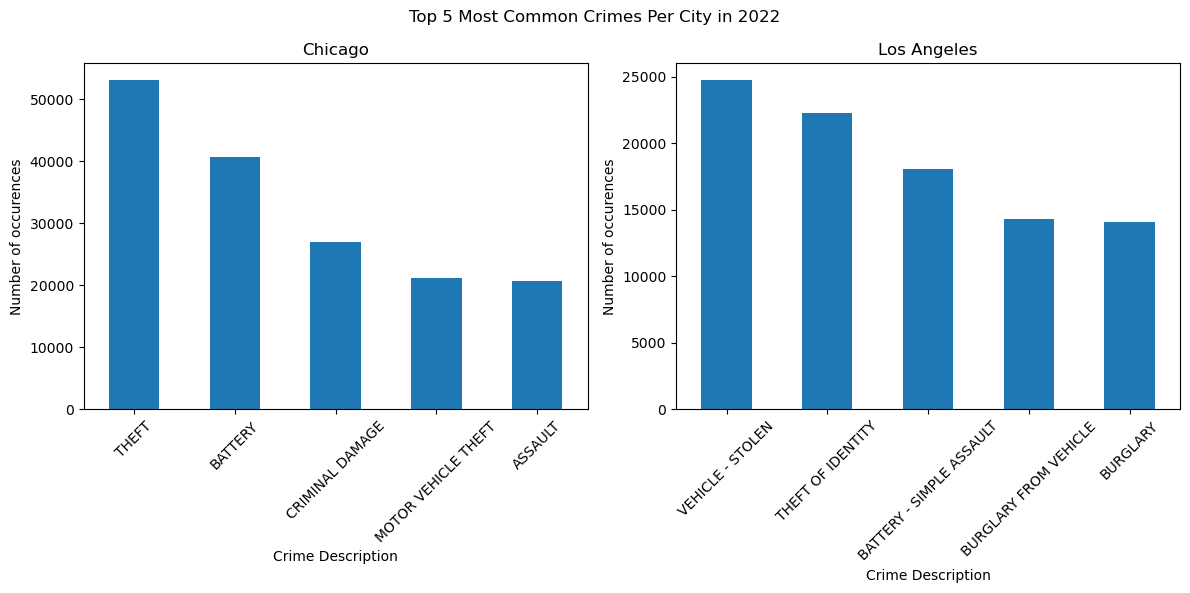

In [3]:
# First visulization: comparing the top five OVERALL most popular types of crime in Chicago and LA (Alex Castillo)
most_frequent_chicago_crimes = chicago_crime_data['Primary Type'].value_counts().head(5)
most_frequest_la_crimes = la_crime_data["Crm Cd Desc"].value_counts().head(5)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
most_frequent_chicago_crimes.plot(kind="bar", ax=ax1)
ax1.set_title("Chicago")
ax1.set_xlabel("Crime Description")
ax1.set_ylabel("Number of occurences")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
most_frequest_la_crimes.plot(kind="bar", ax=ax2)
ax2.set_title("Los Angeles")
ax2.set_xlabel("Crime Description")
ax2.set_ylabel("Number of occurences")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.suptitle("Top 5 Most Common Crimes Per City in 2022")
plt.tight_layout()
plt.show()

Total crime found in specified radius: 1093
Total crime found in specified radius: 582
Total crime found in specified radius: 799
Total crime found in specified radius: 781


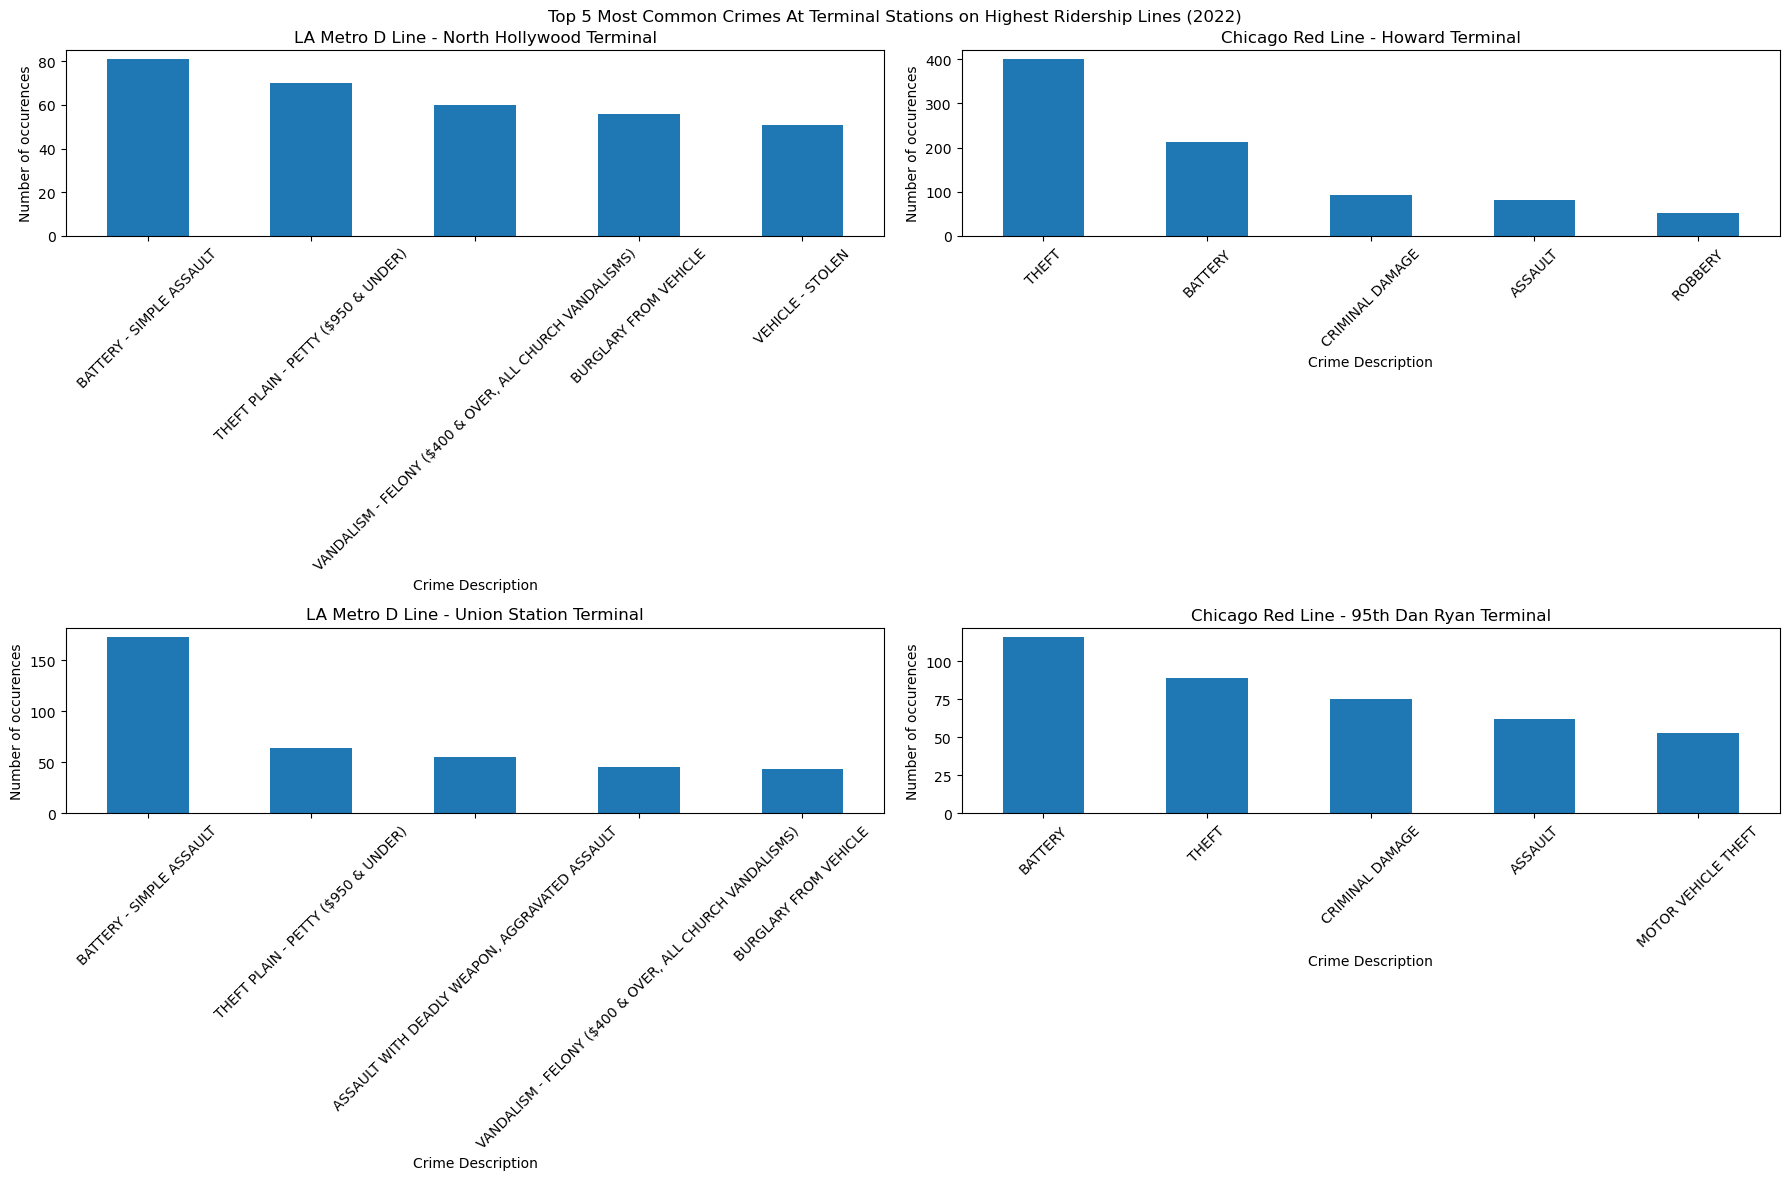

In [4]:
# Second visulization: comparing the five most popular types of crime near the terminus stations on the MOST popular lines for Chicago and LA (Alex Castillo)
chicago_red_line_howard = get_crime_nearby_chicago(42.019063, -87.672892, chicago_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)
chicago_red_line_95th_dan_ryan = get_crime_nearby_chicago(41.722377, -87.624342, chicago_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)
la_union_station = get_crime_nearby_la(34.056061, -118.234759, la_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)
la_north_hollywood_station = get_crime_nearby_la(34.168504, -118.376808, la_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)

fig, axes = plt.subplots(2,2, figsize=(18,12))
chicago_red_line_howard.plot(kind="bar", ax=axes[0, 1])
axes[0, 1].set_title("Chicago Red Line - Howard Terminal")
axes[0, 1].set_xlabel("Crime Description")
axes[0, 1].set_ylabel("Number of occurences")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
chicago_red_line_95th_dan_ryan.plot(kind="bar", ax=axes[1, 1])
axes[1, 1].set_title("Chicago Red Line - 95th Dan Ryan Terminal")
axes[1, 1].set_xlabel("Crime Description")
axes[1, 1].set_ylabel("Number of occurences")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

la_union_station.plot(kind="bar", ax=axes[1, 0])
axes[1, 0].set_title("LA Metro D Line - Union Station Terminal")
axes[1, 0].set_xlabel("Crime Description")
axes[1, 0].set_ylabel("Number of occurences")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
la_north_hollywood_station.plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title("LA Metro D Line - North Hollywood Terminal")
axes[0, 0].set_xlabel("Crime Description")
axes[0, 0].set_ylabel("Number of occurences")
axes[0, 0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)

plt.suptitle("Top 5 Most Common Crimes At Terminal Stations on Highest Ridership Lines (2022)")
plt.tight_layout()
plt.show()

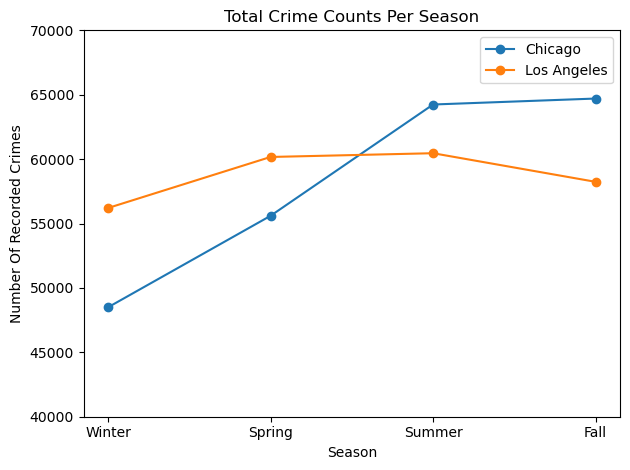

In [5]:
# Third visualization: comparing crime counts by season per city (Alex Castillo)
winter_months = [12, 1, 2]
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]

chicago_crime_data['Date'] = pd.to_datetime(chicago_crime_data['Date'], format='%m/%d/%Y %H:%M')
chicago_number_of_winter_crimes = chicago_crime_data['Date'].dt.month.isin(winter_months).sum()
chicago_number_of_spring_crimes = chicago_crime_data['Date'].dt.month.isin(spring_months).sum()
chicago_number_of_summer_crimes = chicago_crime_data['Date'].dt.month.isin(summer_months).sum()
chicago_number_of_fall_crimes = chicago_crime_data['Date'].dt.month.isin(fall_months).sum()
chicago_seasonal_crime_values = {
    "Winter": chicago_number_of_winter_crimes,
    "Spring": chicago_number_of_spring_crimes,
    "Summer": chicago_number_of_summer_crimes,
    "Fall": chicago_number_of_fall_crimes
}

la_crime_data['Date Rptd'] = pd.to_datetime(la_crime_data['Date Rptd'], format='%m/%d/%y %H:%M')
la_number_of_winter_crimes = la_crime_data['Date Rptd'].dt.month.isin(winter_months).sum()
la_number_of_spring_crimes = la_crime_data['Date Rptd'].dt.month.isin(spring_months).sum()
la_number_of_summer_crimes = la_crime_data['Date Rptd'].dt.month.isin(summer_months).sum()
la_number_of_fall_crimes = la_crime_data['Date Rptd'].dt.month.isin(fall_months).sum()
la_seasonal_crime_values = {
    "Winter": la_number_of_winter_crimes,
    "Spring": la_number_of_spring_crimes,
    "Summer": la_number_of_summer_crimes,
    "Fall": la_number_of_fall_crimes
}

plt.plot(list(chicago_seasonal_crime_values.keys()), list(chicago_seasonal_crime_values.values()), marker='o', label="Chicago")
plt.plot(list(la_seasonal_crime_values.keys()), list(la_seasonal_crime_values.values()), marker='o', label="Los Angeles")
plt.xlabel("Season")
plt.ylabel("Number Of Recorded Crimes")
plt.legend()
plt.title("Total Crime Counts Per Season")
plt.ylim(40000, 70000)
plt.tight_layout()
plt.show()

Total crime found in specified radius: 1093
Total crime found in specified radius: 582
Total crime found in specified radius: 799
Total crime found in specified radius: 781


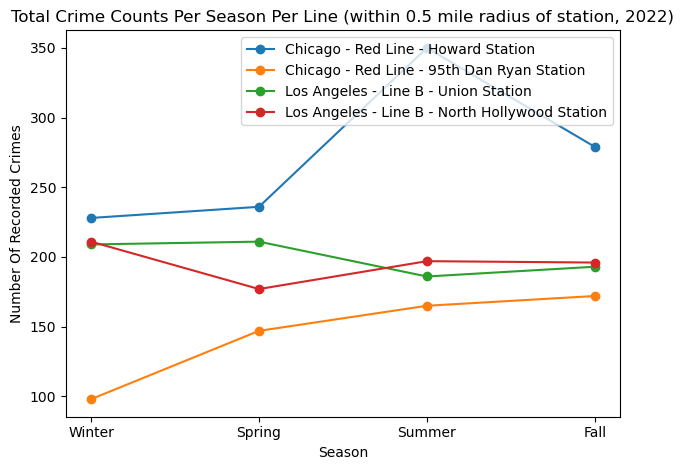

In [6]:
# Fourth visualization: comparing crime counts by season near the terminus stations on the MOST popular lines for Chicago and LA (Alex Castillo)
chicago_crime_data = pd.read_csv(chicago_crime_file, usecols=["Date", "Latitude", "Longitude", "Arrest", "Primary Type"])
chicago_crime_data = chicago_crime_data.dropna(subset=["Latitude", "Longitude"])
la_crime_data = pd.read_csv(la_crime_file, usecols=["Date Rptd", "Crm Cd", "Crm Cd Desc", "LAT", "LON"])
la_crime_data = la_crime_data.dropna(subset=["LAT", "LON"])

chicago_red_line_howard = get_crime_nearby_chicago(42.019063, -87.672892, chicago_crime_data, 0.5)
chicago_red_line_howard = chicago_red_line_howard.sort_index()
chicago_red_line_howard_winter_crime_count = chicago_red_line_howard.loc[12].sum() +  chicago_red_line_howard.loc[1].sum() +  chicago_red_line_howard.loc[2].sum()
chicago_red_line_howard_spring_crime_count = chicago_red_line_howard.loc[3].sum() +  chicago_red_line_howard.loc[4].sum() +  chicago_red_line_howard.loc[5].sum()
chicago_red_line_howard_summer_crime_count = chicago_red_line_howard.loc[6].sum() +  chicago_red_line_howard.loc[7].sum() +  chicago_red_line_howard.loc[8].sum()
chicago_red_line_howard_fall_crime_count = chicago_red_line_howard.loc[9].sum() +  chicago_red_line_howard.loc[10].sum() +  chicago_red_line_howard.loc[11].sum()
chicago_red_line_howard_seasonal_crime_values = {
    "Winter": chicago_red_line_howard_winter_crime_count,
    "Spring": chicago_red_line_howard_spring_crime_count,
    "Summer": chicago_red_line_howard_summer_crime_count,
    "Fall": chicago_red_line_howard_fall_crime_count
}

chicago_red_line_95th_dan_ryan = get_crime_nearby_chicago(41.722377, -87.624342, chicago_crime_data, 0.5)
chicago_red_line_95th_dan_ryan = chicago_red_line_95th_dan_ryan.sort_index()
chicago_red_line_95th_dan_ryan_winter_crime_count = chicago_red_line_95th_dan_ryan.loc[12].sum() +  chicago_red_line_95th_dan_ryan.loc[1].sum() +  chicago_red_line_95th_dan_ryan.loc[2].sum()
chicago_red_line_95th_dan_ryan_spring_crime_count = chicago_red_line_95th_dan_ryan.loc[3].sum() +  chicago_red_line_95th_dan_ryan.loc[4].sum() +  chicago_red_line_95th_dan_ryan.loc[5].sum()
chicago_red_line_95th_dan_ryan_summer_crime_count = chicago_red_line_95th_dan_ryan.loc[6].sum() +  chicago_red_line_95th_dan_ryan.loc[7].sum() +  chicago_red_line_95th_dan_ryan.loc[8].sum()
chicago_red_line_95th_dan_ryan_fall_crime_count = chicago_red_line_95th_dan_ryan.loc[9].sum() +  chicago_red_line_95th_dan_ryan.loc[10].sum() +  chicago_red_line_95th_dan_ryan.loc[11].sum()
chicago_red_line_95th_dan_ryan_seasonal_crime_values = {
    "Winter": chicago_red_line_95th_dan_ryan_winter_crime_count,
    "Spring": chicago_red_line_95th_dan_ryan_spring_crime_count,
    "Summer": chicago_red_line_95th_dan_ryan_summer_crime_count,
    "Fall": chicago_red_line_95th_dan_ryan_fall_crime_count
}

la_union_station = get_crime_nearby_la(34.056061, -118.234759, la_crime_data, 0.5)
la_union_station = la_union_station.sort_index()
la_union_station_winter_crime_count = la_union_station.loc[12].sum() +  la_union_station.loc[1].sum() +  la_union_station.loc[2].sum()
la_union_station_spring_crime_count = la_union_station.loc[3].sum() +  la_union_station.loc[4].sum() +  la_union_station.loc[5].sum()
la_union_station_summer_crime_count = la_union_station.loc[6].sum() +  la_union_station.loc[7].sum() +  la_union_station.loc[8].sum()
la_union_station_fall_crime_count = la_union_station.loc[9].sum() +  la_union_station.loc[10].sum() +  la_union_station.loc[11].sum()
la_line_d_union_station_seasonal_crime_values = {
    "Winter": la_union_station_winter_crime_count,
    "Spring": la_union_station_spring_crime_count,
    "Summer": la_union_station_summer_crime_count,
    "Fall": la_union_station_fall_crime_count
}

la_north_hollywood_station = get_crime_nearby_la(34.168504, -118.376808, la_crime_data, 0.5)
la_north_hollywood_station = la_north_hollywood_station.sort_index()
la_north_hollywood_station_winter_crime_count = la_north_hollywood_station.loc[12].sum() +  la_north_hollywood_station.loc[1].sum() +  la_north_hollywood_station.loc[2].sum()
la_north_hollywood_station_spring_crime_count = la_north_hollywood_station.loc[3].sum() +  la_north_hollywood_station.loc[4].sum() +  la_north_hollywood_station.loc[5].sum()
la_north_hollywood_station_summer_crime_count = la_north_hollywood_station.loc[6].sum() +  la_north_hollywood_station.loc[7].sum() +  la_north_hollywood_station.loc[8].sum()
la_north_hollywood_station_fall_crime_count = la_north_hollywood_station.loc[9].sum() +  la_north_hollywood_station.loc[10].sum() +  la_north_hollywood_station.loc[11].sum()
la_line_d_north_hollywood_station_seasonal_crime_values = {
    "Winter": la_north_hollywood_station_winter_crime_count,
    "Spring": la_north_hollywood_station_spring_crime_count,
    "Summer": la_north_hollywood_station_summer_crime_count,
    "Fall": la_north_hollywood_station_fall_crime_count
}

plt.plot(list(chicago_red_line_howard_seasonal_crime_values.keys()), list(chicago_red_line_howard_seasonal_crime_values.values()), marker='o', label="Chicago - Red Line - Howard Station")
plt.plot(list(chicago_red_line_95th_dan_ryan_seasonal_crime_values.keys()), list(chicago_red_line_95th_dan_ryan_seasonal_crime_values.values()), marker='o', label="Chicago - Red Line - 95th Dan Ryan Station")
plt.plot(list(la_line_d_union_station_seasonal_crime_values.keys()), list(la_line_d_union_station_seasonal_crime_values.values()), marker='o', label="Los Angeles - Line B - Union Station")
plt.plot(list(la_line_d_north_hollywood_station_seasonal_crime_values.keys()), list(la_line_d_north_hollywood_station_seasonal_crime_values.values()), marker='o', label="Los Angeles - Line B - North Hollywood Station")
plt.xlabel("Season")
plt.ylabel("Number Of Recorded Crimes")
plt.legend()
plt.title("Total Crime Counts Per Season Per Line (within 0.5 mile radius of station, 2022)")
plt.tight_layout()
plt.show()

Total crime found in specified radius: 3094
Total crime found in specified radius: 1135


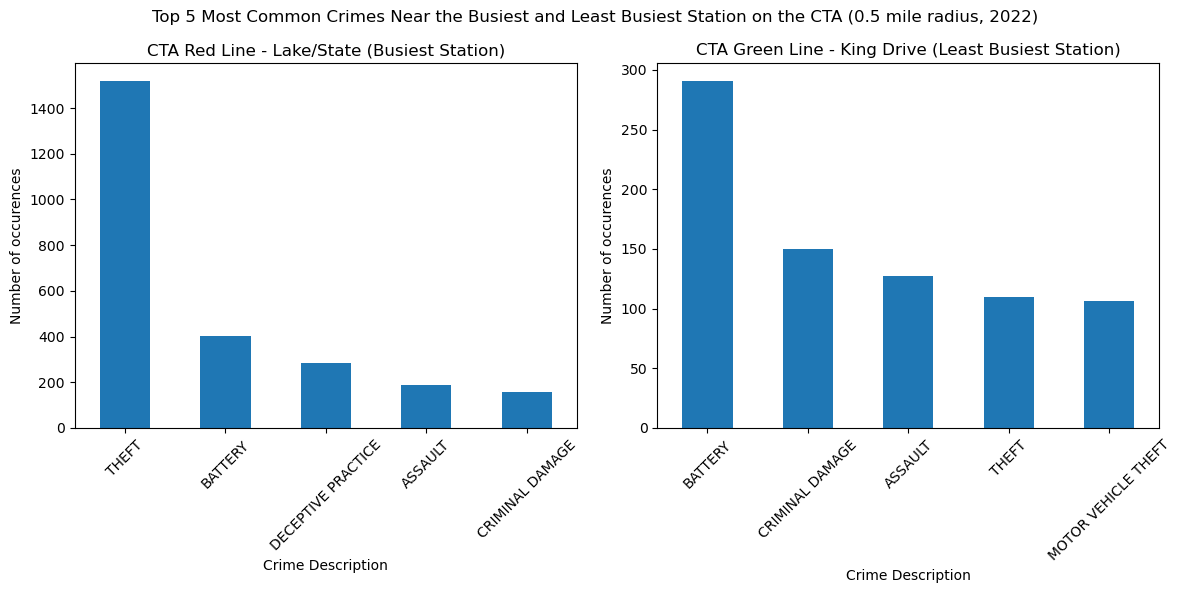

In [7]:
# Fifth Visulization: busiest vs least busiest station top 5 crimes on Chicago CTA (Alex Castillo)
chicago_crime_data = pd.read_csv(chicago_crime_file, usecols=["Date", "Latitude", "Longitude", "Arrest", "Primary Type"])
chicago_crime_data = chicago_crime_data.dropna(subset=["Latitude", "Longitude"])
chicago_cta_busiest_station_crimes = get_crime_nearby_chicago(41.884809, -87.627813, chicago_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)
chicago_cta_least_busiest_station_crimes = get_crime_nearby_chicago(41.78013, -87.615546, chicago_crime_data, 0.5).sum(axis=0).sort_values(ascending=False).head(5)
fig, axes = plt.subplots(1,2, figsize=(12,6))
chicago_cta_busiest_station_crimes.plot(kind="bar", ax=axes[0])
axes[0].set_title("CTA Red Line - Lake/State (Busiest Station)")
axes[0].set_xlabel("Crime Description")
axes[0].set_ylabel("Number of occurences")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
chicago_cta_least_busiest_station_crimes.plot(kind="bar", ax=axes[1])
axes[1].set_title("CTA Green Line - King Drive (Least Busiest Station)")
axes[1].set_xlabel("Crime Description")
axes[1].set_ylabel("Number of occurences")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.suptitle("Top 5 Most Common Crimes Near the Busiest and Least Busiest Station on the CTA (0.5 mile radius, 2022)")
plt.tight_layout()
plt.show()

Total crime found in specified radius: 3094
Total crime found in specified radius: 1135


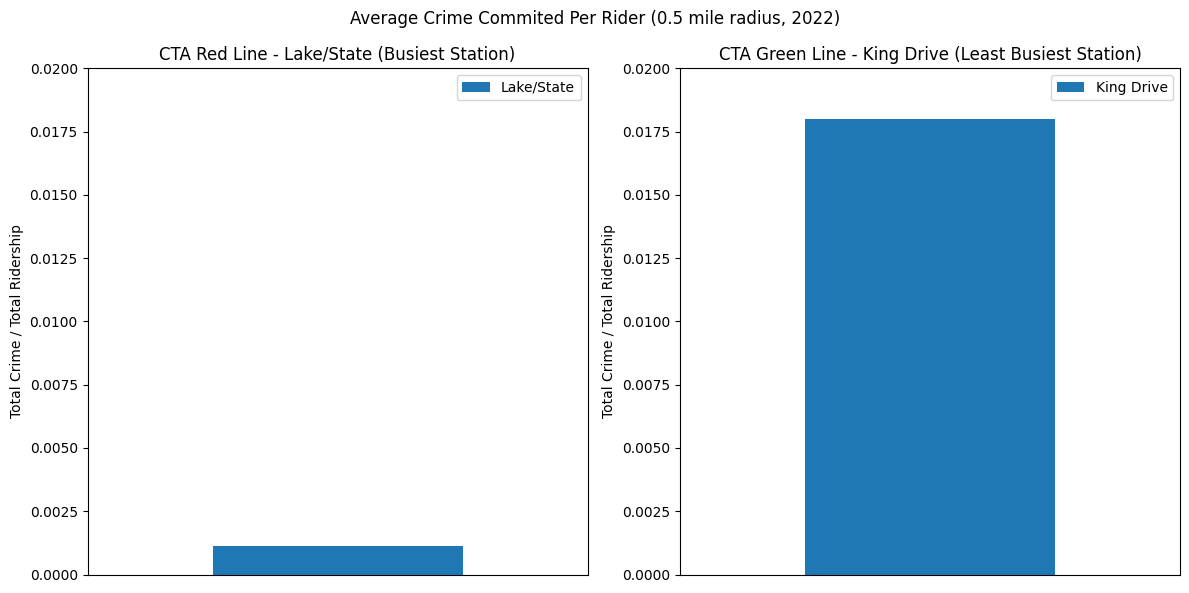

In [27]:
# Sixth Visulization: Total crime / total rider within 0.5 miles at the most and least station in Chicago. (Alex Castillo)
chicago_crime_data = pd.read_csv(chicago_crime_file, usecols=["Date", "Latitude", "Longitude", "Arrest", "Primary Type"])
chicago_crime_data = chicago_crime_data.dropna(subset=["Latitude", "Longitude"])
chicago_cta_busiest_station_crimes = get_crime_nearby_chicago(41.884809, -87.627813, chicago_crime_data, 0.5).sum(axis=0)
chicago_cta_least_busiest_station_crimes = get_crime_nearby_chicago(41.78013, -87.615546, chicago_crime_data, 0.5).sum(axis=0)

# Total annual ridership data manually inserted from CTA ridership data
chicago_cta_busiest_station_crimes = pd.DataFrame({"Lake/State": [chicago_cta_busiest_station_crimes.sum() / 2749185]})
chicago_cta_least_busiest_station_crimes = pd.DataFrame({"King Drive": [chicago_cta_least_busiest_station_crimes.sum() / 63011]})

fig, axes = plt.subplots(1,2, figsize=(12,6))
chicago_cta_busiest_station_crimes.plot(kind="bar", ax=axes[0])
axes[0].set_title("CTA Red Line - Lake/State (Busiest Station)")
axes[0].set_ylabel("Total Crime / Total Ridership")
axes[0].set_xticks([])
axes[0].set_yticks([0.0000, 0.0025, 0.0050, 0.0075, 0.0100, 0.0125, 0.0150, 0.0175, 0.0200])
chicago_cta_least_busiest_station_crimes.plot(kind="bar", ax=axes[1])
axes[1].set_title("CTA Green Line - King Drive (Least Busiest Station)")
axes[1].set_ylabel("Total Crime / Total Ridership")
axes[1].set_xticks([])
axes[1].set_yticks([0.0000, 0.0025, 0.0050, 0.0075, 0.0100, 0.0125, 0.0150, 0.0175, 0.0200])
plt.suptitle("Average Crime Commited Per Rider (0.5 mile radius, 2022)")
plt.tight_layout()
plt.show()

### Done by Zaid Awaidah

In [8]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

In [14]:
# Sixth Visualization - Plots a folium map with markers representing sampled crime incidents.
def plot_sampled_crime_map(data, latitude_col, longitude_col, crime_type_col, sample_size=1000):
    sampled_data = data.sample(min(sample_size, len(data)))

    crime_map = folium.Map(location=[sampled_data[latitude_col].mean(), sampled_data[longitude_col].mean()], zoom_start=12)

    for index, row in sampled_data.iterrows():
        folium.Marker(
            location=[row[latitude_col], row[longitude_col]],
            popup=f"{crime_type_col}: {row[crime_type_col]}",
            icon=None
        ).add_to(crime_map)

    display(crime_map)

# Example usage for Chicago crime data with sampling
plot_sampled_crime_map(chicago_crime_data, "Latitude", "Longitude", "Primary Type")


## ML analyses:

### Done by Zohaib Akram
#### The machine learning models developed for predicting crime occurrences in Chicago and Los Angeles based on the season were evaluated for their accuracy and predictive performance. The accuracy metrics reflect how well the models generalize to new data. The bar plots, illustrating actual and predicted occurrences of the top 5 crimes, provide visual insights into the models' effectiveness. A close alignment between actual and predicted values suggests successful learning of seasonal patterns associated with the specified crimes. The complexity of the neural network architectures, along with normalization techniques for target values, contributes to capturing nuanced relationships in the data. Interpretation involves considering potential areas of model improvement, such as experimenting with architectures, hyperparameters, or additional features. The iterative nature of machine learning interpretation underscores the importance of ongoing refinement and domain-specific considerations in drawing meaningful conclusions from the models' outcomes. For baselines, see above EDA for reference data before implementing ML techniques.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
# Please run above "initial code" cells (total of 2) before running below :)

Accuracy on Test Data (Chicago): 0.32916373014450073
1017/1017 [==============================] - 4s 4ms/step


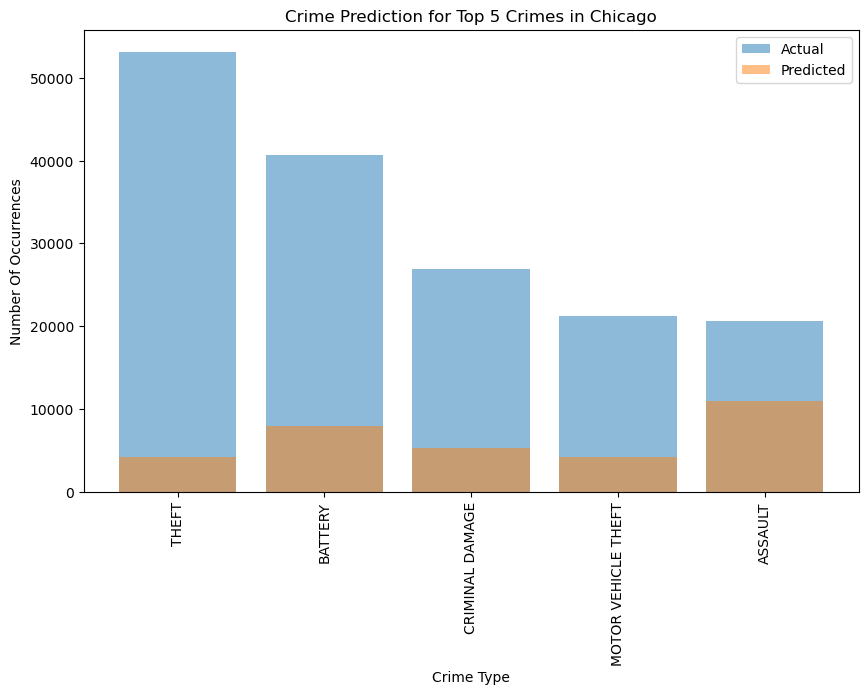

Accuracy on Test Data (Los Angeles): 0.27227962017059326
584/584 [==============================] - 1s 2ms/step


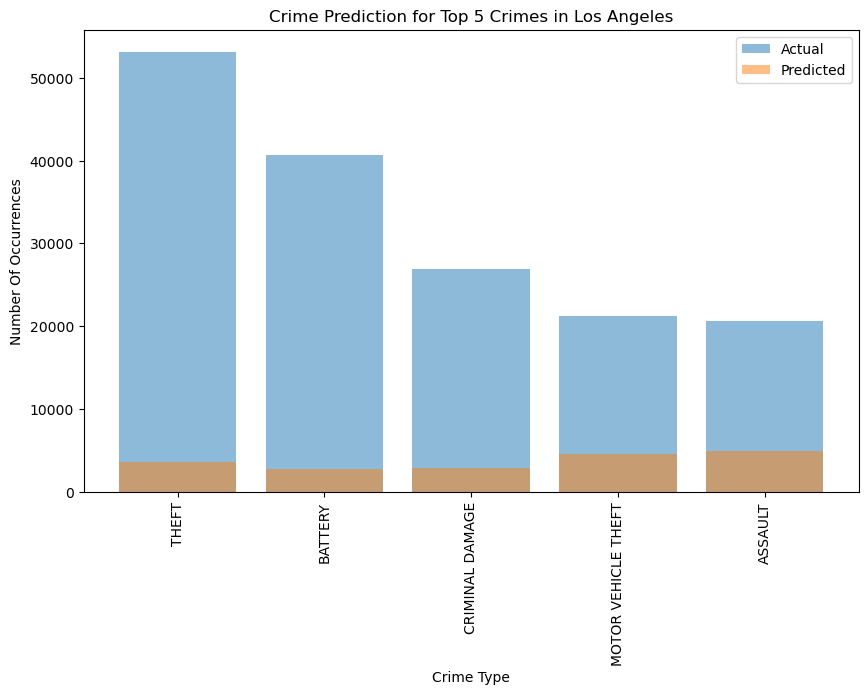

In [13]:
# Extract the top 5 most frequent crimes in Chicago
most_frequent_chicago_crimes = chicago_crime_data['Primary Type'].value_counts().head(5)
chicago_crime_data_top5 = chicago_crime_data[chicago_crime_data['Primary Type'].isin(most_frequent_chicago_crimes.index)].copy()
chicago_crime_data_top5["Date"] = pd.to_datetime(chicago_crime_data_top5["Date"])
# chicago_crime_data_top5.is_copy = None


# Extract the top 5 most frequent crimes in Los Angeles
most_frequent_la_crimes = la_crime_data["Crm Cd Desc"].value_counts().head(5)
la_crime_data_top5 = la_crime_data[la_crime_data["Crm Cd Desc"].isin(most_frequent_la_crimes.index)].copy()
la_crime_data_top5["Date Rptd"] = pd.to_datetime(la_crime_data_top5["Date Rptd"], infer_datetime_format=True)
# la_crime_data_top5.is_copy = None

# Function to process and plot crime data
def process_and_plot_crime_data(city_crime_data, city_name):
    # Choose the appropriate date column
    date_column = 'Date Rptd' if city_name == 'Los Angeles' else 'Date'

    # Extract relevant features and target
    # city_crime_data[date_column] = pd.to_datetime(city_crime_data[date_column])
    features = city_crime_data[date_column].dt.month.values.reshape(-1, 1)
    type_column = 'Crm Cd Desc' if city_name == 'Los Angeles' else 'Primary Type'
    target = city_crime_data[type_column].astype('category').cat.codes.values  # Encode crime types as integers

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build a simplistic neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(len(city_crime_data[type_column].unique()), activation='softmax')  # Softmax for multiclass classification
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f'Accuracy on Test Data ({city_name}): {accuracy}')

    # Make predictions
    predictions = model.predict(X_test_scaled)

    # Plot the actual and predicted crime types
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(most_frequent_chicago_crimes)), most_frequent_chicago_crimes.values, alpha=0.5, label='Actual')
    plt.bar(range(len(most_frequent_chicago_crimes)), predictions.sum(axis=0), alpha=0.5, label='Predicted')
    plt.xticks(range(len(most_frequent_chicago_crimes)), most_frequent_chicago_crimes.index, rotation='vertical')
    plt.xlabel("Crime Type")
    plt.ylabel("Number Of Occurrences")
    plt.title(f"Crime Prediction for Top 5 Crimes in {city_name}")
    plt.legend()
    plt.show()

# Process and plot crime data for Chicago
process_and_plot_crime_data(chicago_crime_data_top5, "Chicago")

# Process and plot crime data for Los Angeles
process_and_plot_crime_data(la_crime_data_top5, "Los Angeles")


1/1 [==============================] - 0s 78ms/step


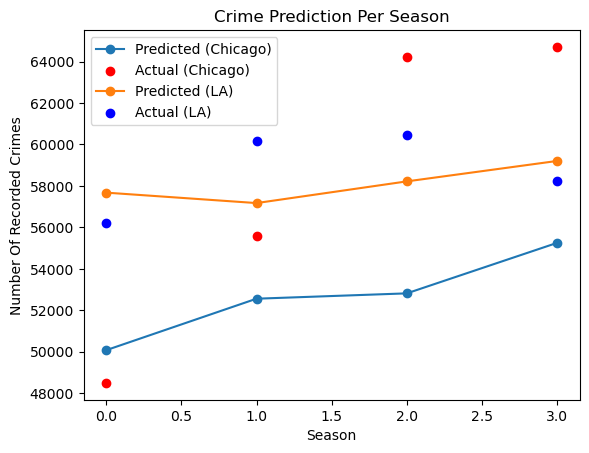

In [12]:
# Extract features and target for Chicago
features_chicago = np.array(list(chicago_seasonal_crime_values.keys()))
target_chicago = np.array(list(chicago_seasonal_crime_values.values()))

# Extract features and target for Los Angeles
features_la = np.array(list(la_seasonal_crime_values.keys()))
target_la = np.array(list(la_seasonal_crime_values.values()))

# Encode seasons as integers
season_mapping = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}
features_chicago_encoded = np.vectorize(season_mapping.get)(features_chicago)
features_la_encoded = np.vectorize(season_mapping.get)(features_la)

# Reshape the data for TensorFlow
X_train_chicago = features_chicago_encoded.reshape(-1, 1)
y_train_chicago = target_chicago.reshape(-1, 1)

X_train_la = features_la_encoded.reshape(-1, 1)
y_train_la = target_la.reshape(-1, 1)

# Normalize the target values
scaler_target_chicago = MinMaxScaler()
y_train_chicago_normalized = scaler_target_chicago.fit_transform(y_train_chicago)

scaler_target_la = MinMaxScaler()
y_train_la_normalized = scaler_target_la.fit_transform(y_train_la)

# Standardize the features
scaler_chicago = StandardScaler()
X_train_chicago_scaled = scaler_chicago.fit_transform(X_train_chicago)

scaler_la = StandardScaler()
X_train_la_scaled = scaler_la.fit_transform(X_train_la)

# Build a more complex neural network model for Chicago
model_chicago = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_chicago.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for Chicago
model_chicago.fit(X_train_chicago_scaled, y_train_chicago_normalized, epochs=100, batch_size=8, verbose=0)

# Build a simple neural network model for Los Angeles
model_la = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_la.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for Los Angeles
model_la.fit(X_train_la_scaled, y_train_la_normalized, epochs=100, batch_size=8, verbose=0)

# Make predictions for Chicago and denormalize
predictions_chicago_normalized = model_chicago.predict(X_train_chicago_scaled)
predictions_chicago = scaler_target_chicago.inverse_transform(predictions_chicago_normalized)

# Make predictions for Los Angeles and denormalize
predictions_la_normalized = model_la.predict(X_train_la_scaled)
predictions_la = scaler_target_la.inverse_transform(predictions_la_normalized)

# Plot the actual and predicted crime counts for Chicago
plt.plot(features_chicago_encoded, predictions_chicago, marker='o', label='Predicted (Chicago)')
plt.scatter(features_chicago_encoded, target_chicago, color='red', label='Actual (Chicago)')

# Plot the actual and predicted crime counts for Los Angeles
plt.plot(features_la_encoded, predictions_la, marker='o', label='Predicted (LA)')
plt.scatter(features_la_encoded, target_la, color='blue', label='Actual (LA)')

plt.xlabel("Season")
plt.ylabel("Number Of Recorded Crimes")
plt.legend()
plt.title("Crime Prediction Per Season")
plt.show()

## Reflection:

- What is the most challenging part of the project that you’ve encountered so far?
    - The most challenging aspect we've encountered in our project has revolved around effectively managing and integrating the diverse datasets obtained from two major cities, Chicago and Los Angeles. These datasets, while rich in information, inherently vary in structure, format, and content due to differences in data collection methods and reporting standards between the cities. The primary challenge has been to harmonize and standardize these datasets to ensure data uniformity, making it possible to draw meaningful comparisons and insights. We have dedicated a considerable amount of effort to address the discrepancies in data formats, which have included variations in date and time representations and the use of unique codes specific to each city. Furthermore, the sheer size of the datasets, given the volume of crime incidents, has presented technical challenges, especially during data cleaning and preprocessing phases. Handling and processing these large datasets efficiently while ensuring data quality have been ongoing challenges that demanded careful attention and resolution.
<br><br>
- What are your initial insights?
    - In our initial data exploration, we've observed distinct variations in the types and frequencies of crimes between Chicago and Los Angeles, aligning with our initial hypothesis. Notably, we have found that both cities exhibit unique crime profiles, which can be attributed to various factors:
        - Population Density: Chicago and Los Angeles have different population densities, which can influence the frequency and types of crimes. Higher population density areas may experience different crime patterns than areas with lower population density.
        - Socioeconomic Conditions: Socioeconomic factors, such as income levels and employment rates, can significantly impact crime rates. Areas with varying socioeconomic conditions may exhibit differences in the prevalence of certain crimes.
        - Law Enforcement Practices: The approach to law enforcement and policing strategies in each city can impact crime reporting and response. Variations in law enforcement practices can contribute to differences in crime data.
        - Climatic Variations: Weather and climate conditions can influence criminal behavior. Chicago and Los Angeles have distinct climates, which could lead to seasonal variations in certain types of crimes. This also already been shown in some of the provided visualizations above.
        - Quality of Public Transportation Infrastructure: As a significant focus of our project, the quality and accessibility of public transportation can influence the nature of crimes around transit services. Areas with well-developed public transportation systems may have different crime profiles than areas with limited access.
<br><br>
- Are there any concrete results you can show at this point? If not, why not?
    - We've made good progress in generating concrete results through various visualizations. These visuals help us understand the data better. For instance, we've compared the top five most common crime types in both cities, which gives us a clear picture of the prevalent crimes. We've also looked at crime counts near terminal stations of popular transit lines, allowing us to see if there are any patterns related to public transportation. Seasonal crime trends have been analyzed, shedding light on how crimes vary throughout the year. Moreover, we've examined crime occurrences near the busiest and least busiest transit stations, giving us insights into the safety of these areas. These visualizations are valuable outcomes of our project, and they lay the foundation for more in-depth analysis in the future.
<br><br>
- Going forward, what are the current biggest problems you’re facing?
    - As we look ahead, there are a couple of significant challenges that we're currently grappling with. First and foremost, we're working on understanding the relationship between ridership and crime rates in both Chicago and Los Angeles. However, we've encountered a roadblock in the form of limited access to individual station ridership data in Los Angeles. To tackle this issue, we're in the process of developing a methodology that will enable us to gain insights into the potential connection between public transit usage and crime occurrences effectively.
    - Additionally, we're constantly striving to enhance the quality and usability of our visualizations. Making our visualizations more presentable and informative is an ongoing concern. We believe that clear and well-designed visual representations of the data are crucial for conveying our findings. So, refining our visualizations to ensure they effectively communicate the insights we've gained remains a top priority in our project.
    - Lastly, we need to perform further statistical analysis  to derive concrete results and conclusions,we would need to perform advanced statistical analysis and hypothesis testing. This may involve regression analysis to quantify the relationship between ridership and crime, as well as time-series analysis to understand seasonal trends in crime rates.
<br><br>
- Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
    - Indeed, we are confident that we are on track with our project, and we have adhered to the scope and milestones we set out in our initial proposal. Nonetheless, there are particular aspects of the project that we must dedicate more time and attention to in order to maintain our progress.
    - The analysis phase is one area that deserves continuous focus, as well as generating additional visualizations. We need to delve deeper into the data to extract valuable insights and patterns that might not be immediately apparent. This means dedicating time to refining our analytical methods and conducting in-depth examinations of the data.
<br><br>
- Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
    - Yes, we are fully convinced that it is worth proceeding with our project. It is worth proceeding with the project because the project aims to analyze crime data from the year 2022 in Chicago and Los Angeles, specifically focusing on the impact of public transportation on crime patterns.The project seeks to identify patterns, trends, and correlations within the datasets to aid in crime prevention and intervention efforts. The research questions include understanding the dominant types of crimes in each city and how they change in the vicinity of public transit services, the fluctuation of crime frequency throughout the year, the susceptibility of specific neighborhoods to certain crimes, the correlation between crime prevalence and public transit ridership, and the extent to which public transit frequency correlates with crime rates in specific areas.The initial exploration of the data has revealed significant disparities in crime patterns between Chicago and Los Angeles. These distinctions highlight the unique urban dynamics, law enforcement practices, and public safety challenges faced by each city.
    - Moving forward, we plan to continue our data analysis and visualization efforts, as we believe that a more comprehensive examination of the datasets will offer even more valuable insights. We will refine our methods, incorporate additional data sources where possible, and expand our analyses to delve deeper into the underlying causes and consequences of these disparities. In summary, the initial exploration has solidified our commitment to this project, and we are eager to advance our research and provide valuable insights for both Chicago and Los Angeles.
<br><br>

## Next steps:

For the most part, our next steps simply involve further exploring our data along with coming up with visuilzations. However, there are some specific things we would like to work on.

1. Try to combine our data so that its a little more uniform and easier to read, even in its raw format (as a CSV).

2. One of the questions we would like to investigate with this project is our ridership affects a line. Since we do not have individual station ridership data for LA, we have to think about how we would like to navigate this. One idea we have is to potentially look at the "end of the line" stations or perhaps the "middle most" station. A second idea we have is to simply investigate this on individually with Chicago since that is the city we have the station-based ridership data for.

3. Generating visualizations that are more presentable is another thing we would like to do. This will involve getting more comfortable with using plotting tools like Seaborn; perhaps even referencing some of the work we have done in HW2.

4. After we have our visualizations complete, we would like to come up with some answer to our initial questions presented in our proposal, making sure to remain objective.